# COMPANY OVERVIEW 
HELP INTERNATIONAL is an International Humanitarian NGO that is committed to fighting poverty and providing the people of developing countries with basic amenities and relief during the time of disasters and natural calamities.

# PROBLEM STATEMENT
HELP INTERNATIONAL want to leverage their data to 
1. Identify the group of countries that are the epicenter of the Social Issues they are trying to address.
2. Countries with low output(gdpp) and lower life expectancy to prioritize when distributing AID to the countries.

# CODE FLOW
 1. Load Relevant Libraries
---
 2. Load Dataset
 -  Descriptive and statistical Analysis of the dataset
 -  Check for Missing and Irrelevant Values and treat accordingly
---
 3. Exploratory Data Analysis (EDA)
 -  Unvariate Analysis
 -  Bi-variate Analysis
 -  Multivariate Analysis
---
 4. Feature Engineering/Data Pre-Processing
 -  Create new features if necessary for more accurate analysis
 -  Scale Data to cover for any outliers/inbalances of the dataset
---
 5. Build Machine Learning Model - Unsupervised ML
 -  Use the K-Means Clustering Classifer to Determine the Optimal Number of Clusters
 -  Train the model
 -  Evaluate the Model
---
 6. Ploting an interactive GeoMAP to show the categories in the Model
---

# Load Relevant Libraries

In [194]:
# Data Analysis Library
import pandas as pd
import numpy as np

# Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Pre-Processing Library
from sklearn.preprocessing import StandardScaler

# For Machine Learning and Evalution
from sklearn.cluster import KMeans

# For warnings
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [201]:
help_data = pd.read_csv('Country-data - Country-data.csv')
help_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [91]:
help_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [92]:
help_data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


# Check for Missing Values

In [93]:
help_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

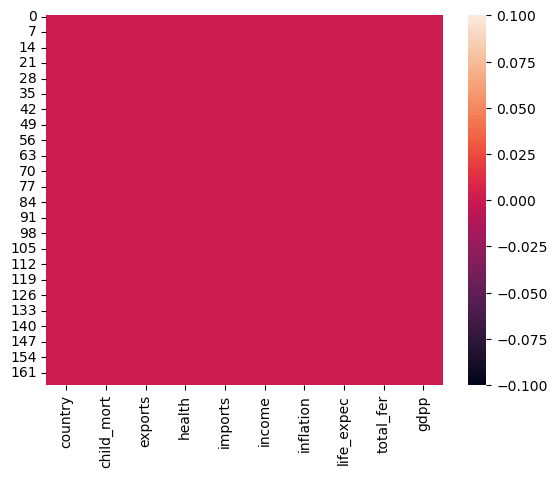

In [94]:
# Visualize to check for missing values
sns.heatmap(help_data.isnull());

# Exploratory Data Analysis - EDA

#### Univariate Analysis on Numerical Data

In [95]:
# Extract all columns
print('----- ALL COLUMNS -----')
print(help_data.columns)

# Extract only 'country' column
print('\n----- COUNTRY COLUMNS -----')
print(help_data['country'])

# Extract all columns except 'country' using indexing
print('\n----- ALL COLUMNS EXCEPT COUNTRY COLUMN -----')
print(help_data.columns[1:])

----- ALL COLUMNS -----
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

----- COUNTRY COLUMNS -----
0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

----- ALL COLUMNS EXCEPT COUNTRY COLUMN -----
Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


In [96]:
# Extract Numerical Data
numerical_data = help_data.select_dtypes(exclude = 'object')
numerical_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


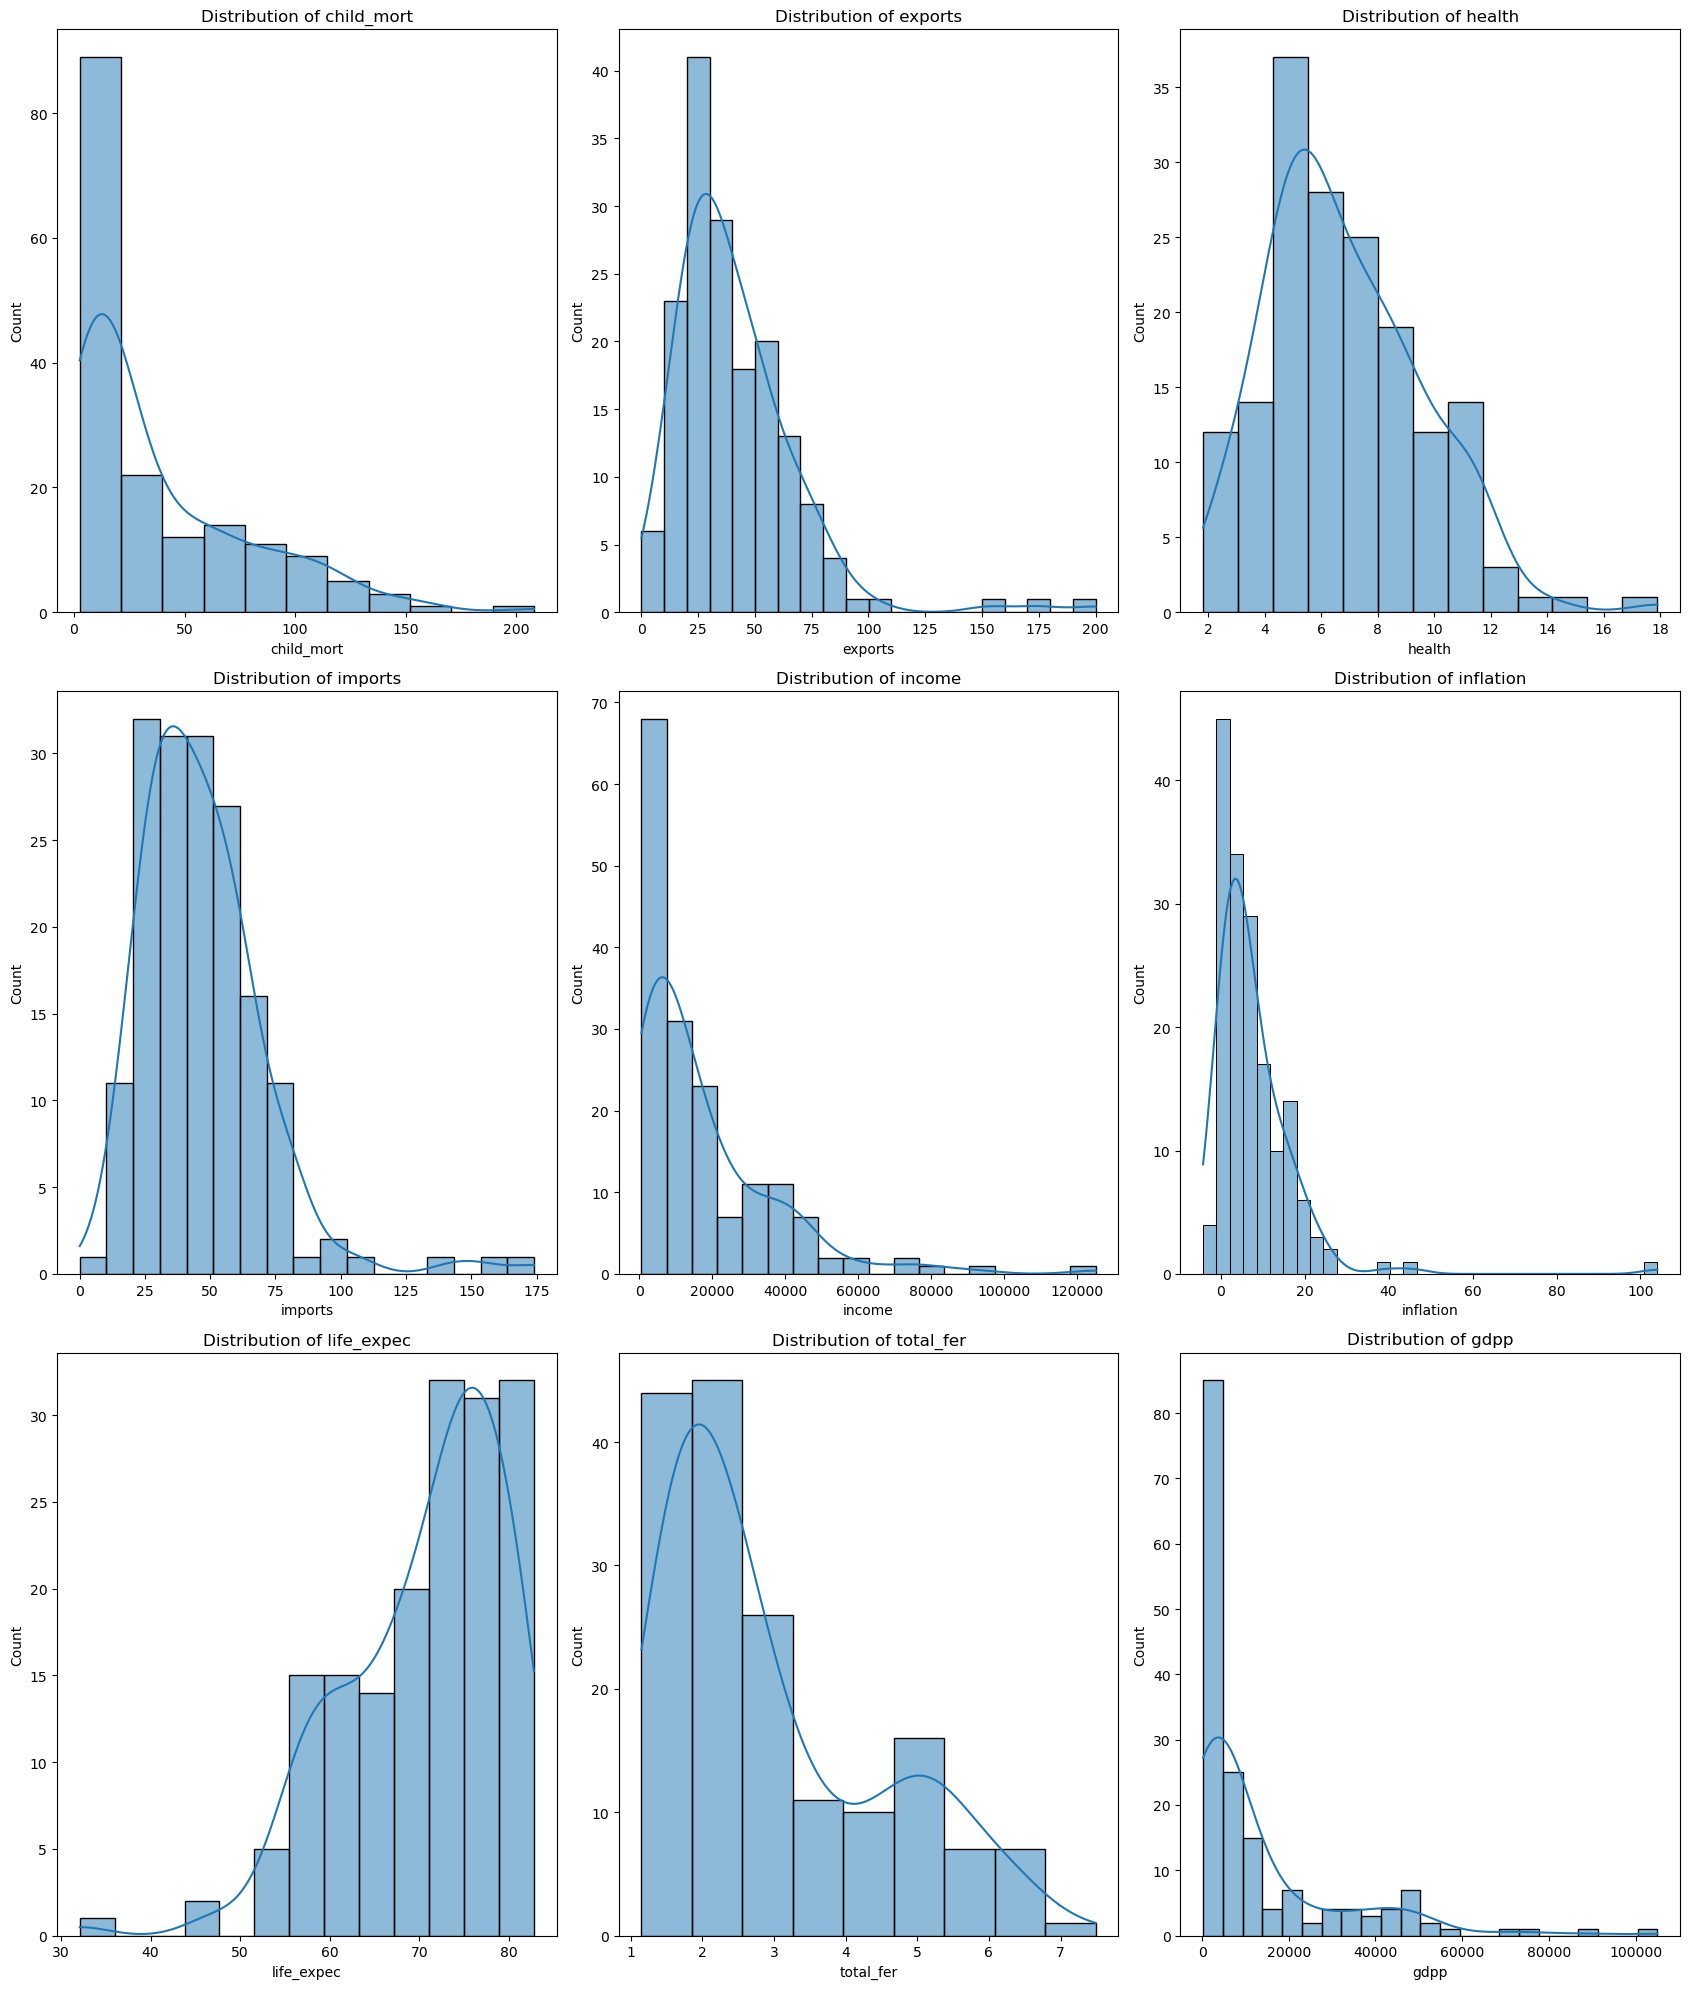

In [97]:
# Visualize the Distribution of the Numerical Data - Univariate Analysis
plt.figure(figsize = (17, 20))

for i, column_name in enumerate(numerical_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(help_data[column_name], kde = True)
    plt.title(f'Distribution of {column_name}')

plt.tight_layout()
plt.show();

INSIGHT:
- Child Mortality (child_mort):
  Skewed right, indicating a higher frequency of lower child mortality rates.

- Exports (exports):
  Slightly skewed right, indicating most countries have lower export percentages.

- Health (health):
  Relatively symmetric distribution around the mean.

- Imports (imports):
  Slightly skewed right, similar to exports.

- Income (income):
  Highly skewed right, with a few countries having significantly higher incomes.

- Inflation (inflation):
  Skewed right, with some countries experiencing high inflation rates.

- Life Expectancy (life_expec):
  Relatively symmetric distribution around the mean.

- Total Fertility Rate (total_fer):
  Skewed right, with higher frequency of lower fertility rates.

- GDP per capita (gdpp):
  Highly skewed right, indicating a few countries with very high GDP per capita.

#### Bi-variate Analysis
 
Perform bivariate EDA on the following:

1. Relationship between two numerical columns in the dataset.
2. Countries Child Mortality Rate (Top 5, Least 5)
3. Countries Exports levels (Top 5, Least 5)
4. Countries Imports levels (Top 5, Least 5)
5. Countries Health Spending levels (Top 5, Least 5)
6. Countries Life Expectancy levels (Top 5, Least 5)
7. Countries Female Fertility Rate levels (Top 5, Least 5)
8. Countries GDP Contribution /Person levels (Top 5, Least 5)

In [24]:
# Extract the dataset
help_data.head(0)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


###### 1. Relationship between two numerical columns in the dataset.

<Figure size 1500x2000 with 0 Axes>

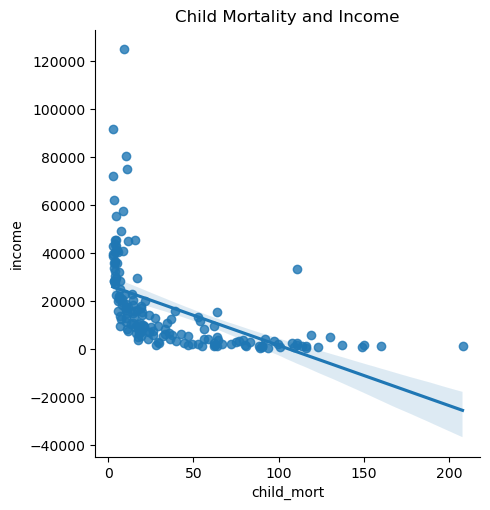

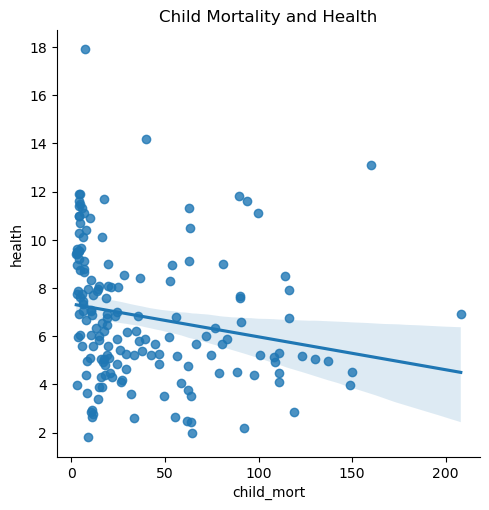

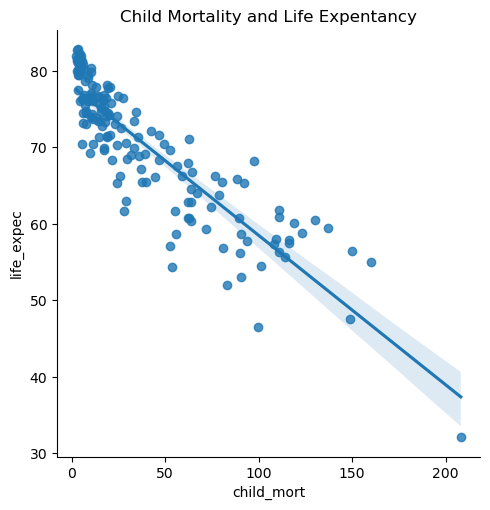

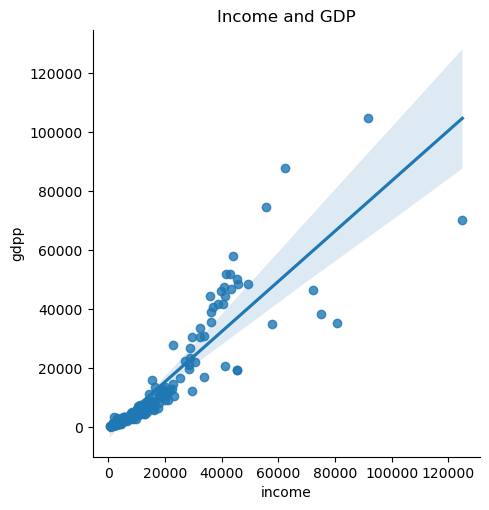

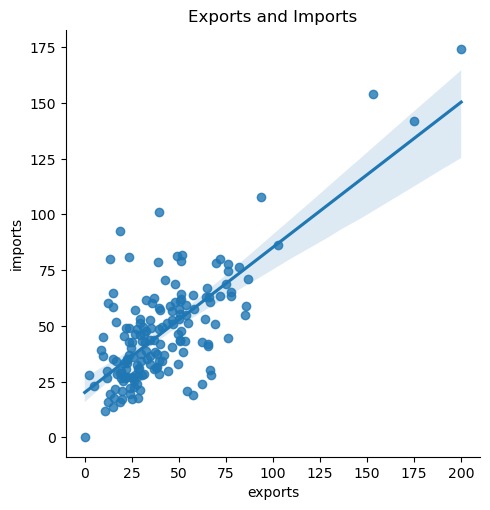

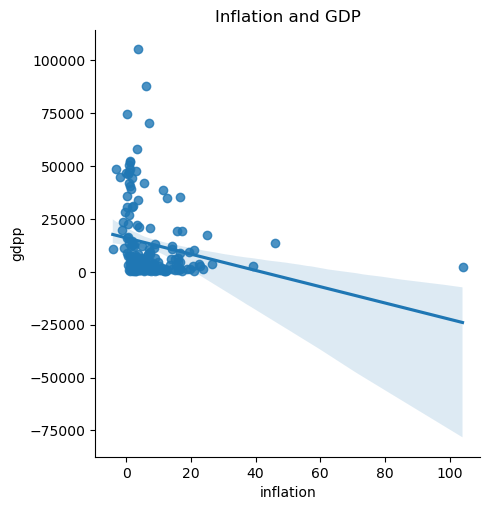

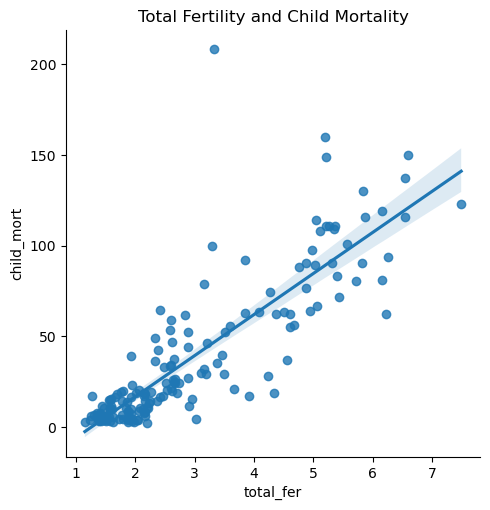

In [103]:
# Plotting lm plot to visualize the relationship between the columns in the dataset 
plt.figure(figsize = (15,20))

#'Child Mortality vs Income'
sns.lmplot(x = 'child_mort', y = 'income', data = help_data)
plt.title('Child Mortality and Income')

#'Child Mortality vs Health'
sns.lmplot(x = 'child_mort', y = 'health', data = help_data)
plt.title('Child Mortality and Health')

#'Child Mortality vs Life Expentancy'
sns.lmplot(x = 'child_mort', y = 'life_expec', data = help_data)
plt.title('Child Mortality and Life Expentancy')

#'Income vs GDP'
sns.lmplot(x = 'income', y = 'gdpp', data = help_data)
plt.title('Income and GDP')

#'Exports vs Imports'
sns.lmplot(x = 'exports', y = 'imports', data = help_data)
plt.title('Exports and Imports')

#'Inflation vs GDP'
sns.lmplot(x = 'inflation', y = 'gdpp', data = help_data)
plt.title('Inflation and GDP')

#'Total Fertility vs Child Mortality'
sns.lmplot(x = 'total_fer', y = 'child_mort', data = help_data)
plt.title('Total Fertility and Child Mortality');

INSIGHT:

- `Child Mortality vs Income:` Higher income is associated with lower child mortality rates, showing a negative relationship where the curve slopes downward from left to right.
---
- `Child Mortality vs Health:` Generally, lower health expenditure is associated with higher child mortality rates. However, there are instances where both low health expenditure and low child mortality occur, as well as cases where high health expenditure coincides with high child mortality.
---
- `Child Mortality vs Life Expentancy:` Higher Life Expentancy is associated with lower child mortality rates, showing a negative relationship where the curve slopes downward from left to right.
---
- `Income vs GDP:` Higher income is associated with higher GDP, showing a positive relationship with an upward slope. However, there is a concentration of low to medium income levels with only a modest increase in GDP.
---
- `Exports vs Imports:` Higher exports are associated with higher imports, indicating a positive relationship where the curve slopes upward. However, there is a concentration of low to medium exports with only a modest increase in imports, and fewer cases of high exports paired with high imports.
---
- `Inflation vs GDP:` Low inflation is generally associated with high GDP. However, there is a high concentration of low inflation with low GDP, and few instances of high inflation with low GDP. The curve slopes downward, indicating a negative relationship where higher inflation is linked to lower GDP.
---
- `Total Fertility vs Child Mortality:`Higher total fertility is associated with higher child mortality rates, indicating a positive relationship where the curve slopes upward from left to right.
---

###### 2. Countries Child Mortality Rate (Top 5, Least 5)

In [104]:
help_data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [105]:
# The Top 5 countries
top_five_child_mort = help_data.sort_values(by = 'child_mort', ascending = False)[:5]

In [107]:
# The Least 5 countries
least_five_child_mort = help_data.sort_values(by = 'child_mort')[:5]

In [108]:
print('---- The Top 5 Child Mort ----')
top_five_child_mort

---- The Top 5 Child Mort ----


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


In [109]:
print('\n---- The Least 5 Child Mort ----')
least_five_child_mort


---- The Least 5 Child Mort ----


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100


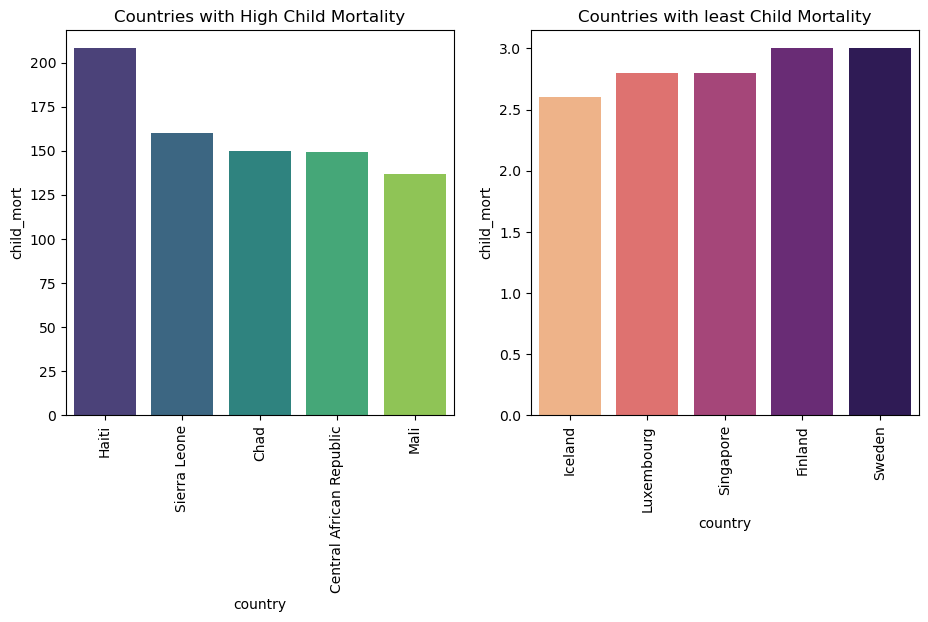

In [110]:
# Use Barplot to Visualize
plt.figure(figsize = (11, 5))

plt.subplot(1,2,1)
sns.barplot(x = 'country', y = 'child_mort', data = top_five_child_mort, palette ='viridis')
plt.title('Countries with High Child Mortality')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x = 'country', y = 'child_mort', data = least_five_child_mort, palette ='magma_r')
plt.title('Countries with least Child Mortality')
plt.xticks(rotation = 90)

plt.tight_layout
plt.show();

###### 3. Countries Exports levels (Top 5, Least 5)
###### 4. Countries Imports levels (Top 5, Least 5)
###### 5. Countries Health Spending levels (Top 5, Least 5)
###### 6. Countries Life Expectancy levels (Top 5, Least 5)
###### 7. Countries Female Fertility Rate levels (Top 5, Least 5)
###### 8. Countries GDP Contribution /Person levels (Top 5, Least 5)

In [53]:
help_data.head(0)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


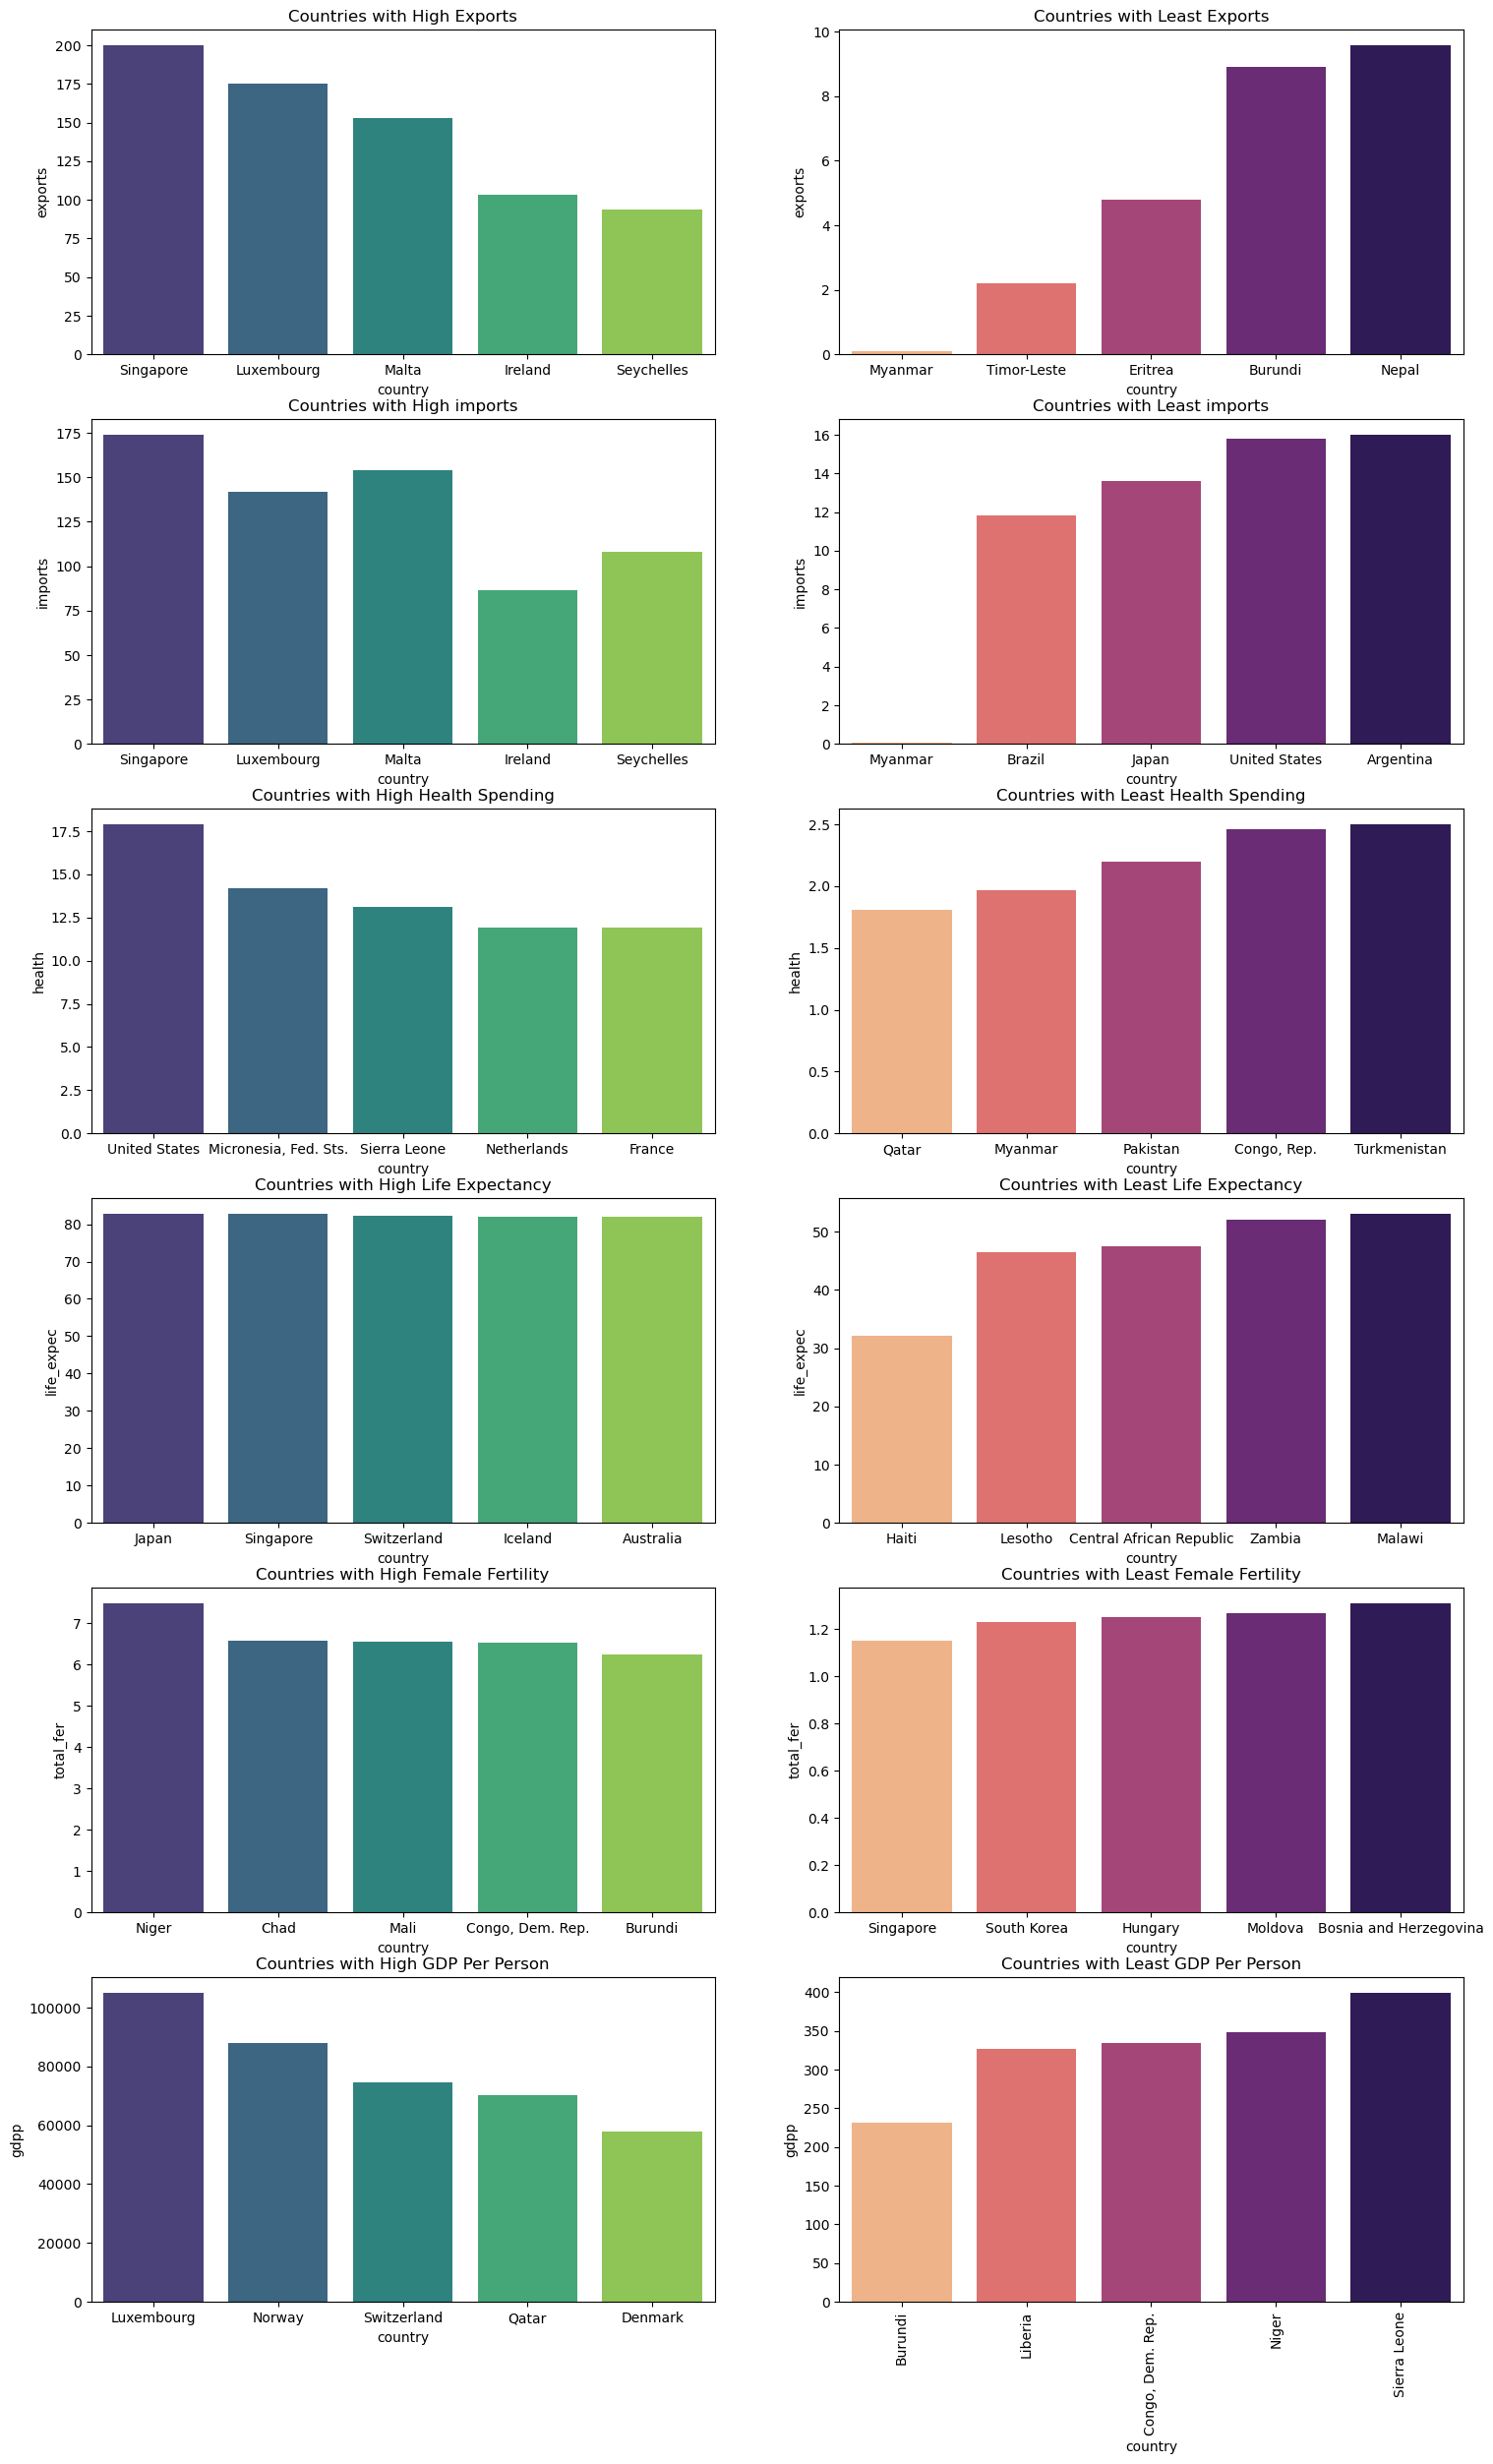

In [111]:
# Use Barplot to Visualize
fig, axs = plt.subplots(6, 2, figsize = (18, 30))

# The Top 5/ Least 5 Export levels
top_five_exports= help_data.sort_values(by = 'exports', ascending = False)[:5]
least_five_exports = help_data.sort_values(by = 'exports')[:5]

sns.barplot(x = 'country', y = 'exports', data = top_five_exports, palette ='viridis', ax = axs[0,0])
axs[0,0].set_title('Countries with High Exports')
plt.xticks(rotation = 90)

sns.barplot(x = 'country', y = 'exports', data = least_five_exports, palette ='magma_r', ax = axs[0,1])
axs[0,1].set_title('Countries with Least Exports')
plt.xticks(rotation = 90)

# The Top 5/ Least 5 Import levels
top_five_imports= help_data.sort_values(by = 'imports', ascending = False)[:5]
least_five_imports = help_data.sort_values(by = 'imports')[:5]

sns.barplot(x = 'country', y = 'imports', data = top_five_exports, palette ='viridis', ax = axs[1,0])
axs[1,0].set_title('Countries with High imports')
plt.xticks(rotation = 90)

sns.barplot(x = 'country', y = 'imports', data = least_five_imports, palette ='magma_r', ax = axs[1,1])
axs[1,1].set_title('Countries with Least imports')
plt.xticks(rotation = 90)

# The Top 5/ Least 5 Health Spending levels
top_five_health = help_data.sort_values(by = 'health', ascending = False)[:5]
least_five_health = help_data.sort_values(by = 'health')[:5]

sns.barplot(x = 'country', y = 'health', data = top_five_health, palette ='viridis', ax = axs[2,0])
axs[2,0].set_title('Countries with High Health Spending')
plt.xticks(rotation = 90)

sns.barplot(x = 'country', y = 'health', data = least_five_health, palette ='magma_r', ax = axs[2,1])
axs[2,1].set_title('Countries with Least Health Spending')
plt.xticks(rotation = 90)

# The Top 5/ Least 5 Life Expentancy levels
top_five_life_expec = help_data.sort_values(by = 'life_expec', ascending = False)[:5]
least_five_life_expec = help_data.sort_values(by = 'life_expec')[:5]

sns.barplot(x = 'country', y = 'life_expec', data = top_five_life_expec, palette ='viridis', ax = axs[3,0])
axs[3,0].set_title('Countries with High Life Expectancy')
plt.xticks(rotation = 90)

sns.barplot(x = 'country', y = 'life_expec', data = least_five_life_expec, palette ='magma_r', ax = axs[3,1])
axs[3,1].set_title('Countries with Least Life Expectancy')
plt.xticks(rotation = 90)

# The Top 5/ Least 5 Female Fertility levels
top_five_total_fer = help_data.sort_values(by = 'total_fer', ascending = False)[:5]
least_five_total_fer = help_data.sort_values(by = 'total_fer')[:5]

sns.barplot(x = 'country', y = 'total_fer', data = top_five_total_fer, palette ='viridis', ax = axs[4,0])
axs[4,0].set_title('Countries with High Female Fertility')
plt.xticks(rotation = 90)

sns.barplot(x = 'country', y = 'total_fer', data = least_five_total_fer, palette ='magma_r', ax = axs[4,1])
axs[4,1].set_title('Countries with Least Female Fertility')
plt.xticks(rotation = 90)

# The Top 5/ Least 5 GDP Per Person levels
top_five_gdpp = help_data.sort_values(by = 'gdpp', ascending = False)[:5]
least_five_gdpp = help_data.sort_values(by = 'gdpp')[:5]

sns.barplot(x = 'country', y = 'gdpp', data = top_five_gdpp, palette ='viridis', ax = axs[5,0])
axs[5,0].set_title('Countries with High GDP Per Person')
plt.xticks(rotation = 90)

sns.barplot(x = 'country', y = 'gdpp', data = least_five_gdpp, palette ='magma_r', ax = axs[5,1])
axs[5,1].set_title('Countries with Least GDP Per Person')
plt.xticks(rotation = 90)


plt.tight_layout
plt.show();

#### Multivariate Analysis

In [126]:
numerical_data_corr = help_data.select_dtypes(exclude = 'object').corr()
numerical_data_corr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


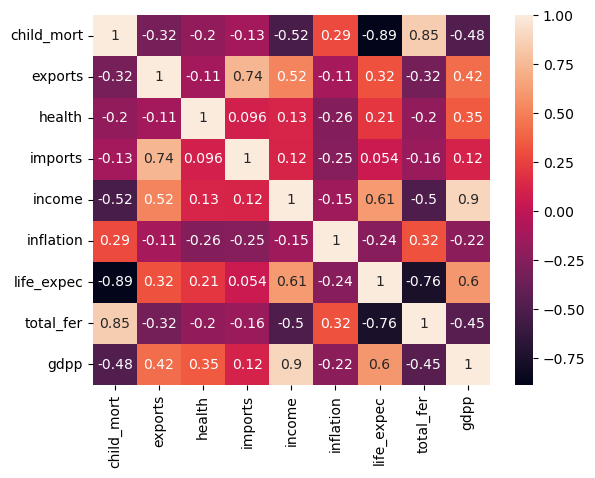

In [129]:
# Visualize with a correlation map
sns.heatmap(numerical_data.corr(), annot = True);

`Insight:` 
1. `Strongest Positive Correlations:`
 - Child Mortality and Total Fertility: 0.85, indicating that higher fertility rates are linked to higher child mortality.
 - Exports and Imports: 0.74, showing that increases in exports are associated with increases in imports.
 - Income and Life Expectancy: 0.61, suggesting that higher income is related to longer life expectancy.
2. `Moderate Positive Correlation:`
 - Income and Exports: 0.52, reflecting a moderate positive relationship where higher income is associated with higher exports.
 - Exports and GDP: 0.42, indicating that higher exports are associated with higher GDP per capita.
3. `Strongest Negative Correlations:`
 - Child Mortality and Life Expectancy: -0.89, showing that higher child mortality is linked to lower life expectancy.
 - Total Fertility and Life Expectancy: -0.76, suggesting that higher fertility rates are associated with lower life expectancy.
 - Child Mortality and Income: -0.52, indicating that higher income is associated with lower child mortality.
 - Child Mortality and GDP: -0.48, reflecting that higher child mortality is linked to lower GDP per capita.
 - Total Fertility and GDP: -0.45, suggesting that higher fertility rates are associated with lower GDP per capita.
 
`Visual Aids:` 
The heatmap uses color intensity to represent the strength of correlations, with darker shades indicating stronger relationships among the variables.

In [115]:
numerical_data.head(0)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


# Feature Engineering / Data Pre-processing

- Some features belong to similar categories and behave similarly with features from other categories:
- Lets create new features that fall into the three categories:
    - Health: child_mort, health, life_expec, total_fer.
    - Finance: income, inflation, gdpp.
    - Trade: exports, imports.

In [138]:
# Normalize the data - since each column has different values - before creating the new features for the categories.
# Add up the mean of +ve corr columns.
# Subtract the non corr columns.
# Create a New Data Frame. 
# Create a list for the columns in the new dataframe.
# Call/Print the New Data Frame.

In [ ]:
# Calculate the mean of the columuns in 3 Categories.

# HEALTH:
help_data['child_mort']/help_data['child_mort'].mean()
help_data['health']/help_data['health'].mean()
help_data['life_expec']/help_data['life_expec'].mean()
help_data['total_fer']/help_data['total_fer'].mean()

# FINANCE:
help_data['income']/help_data['income'].mean()
help_data['inflation']/help_data['inflation'].mean()
help_data['gdpp']/help_data['gdpp'].mean()

# TRADE:
help_data['exports']/help_data['exports'].mean()
help_data['imports']/help_data['imports'].mean()

In [ ]:
# Add up the mean of +ve corr columns

# HEALTH:
help_data['child_mort']/help_data['child_mort'].mean() + help_data['total_fer']/help_data['total_fer'].mean()
help_data['health']/help_data['health'].mean() + help_data['life_expec']/help_data['life_expec'].mean()

# FINANCE
help_data['income']/help_data['income'].mean() + help_data['gdpp']/help_data['gdpp'].mean()
help_data['inflation']/help_data['inflation'].mean()

# TRADE
help_data['exports']/help_data['exports'].mean() + help_data['imports']/help_data['imports'].mean()

In [ ]:
# Subtract the non corr columns

# HEALTH:
(help_data['child_mort']/help_data['child_mort'].mean() + 
 help_data['total_fer']/help_data['total_fer'].mean()) - 
(help_data['health']/help_data['health'].mean() + 
help_data['life_expec']/help_data['life_expec'].mean())

# FINANCE
(help_data['income']/help_data['income'].mean() + 
 help_data['gdpp']/help_data['gdpp'].mean()) - 
help_data['inflation']/help_data['inflation'].mean()

# TRADE
help_data['exports']/help_data['exports'].mean() + help_data['imports']/help_data['imports'].mean()

In [131]:
# Create new data frame for categories
new_help_data = pd.DataFrame()

In [143]:
# create a list for the columns in the new dataframe
new_help_data['Health'] = ((help_data['child_mort']/help_data['child_mort'].mean() + 
                            help_data['total_fer']/help_data['total_fer'].mean()) - 
                            (help_data['health']/help_data['health'].mean() + 
                            help_data['life_expec']/help_data['life_expec'].mean()))

new_help_data['Finance'] = ((help_data['income']/help_data['income'].mean() + 
                             help_data['gdpp']/help_data['gdpp'].mean()) - 
                            help_data['inflation']/help_data['inflation'].mean())

new_help_data['Trade'] = (help_data['exports']/help_data['exports'].mean() + 
                          help_data['imports']/help_data['imports'].mean())

In [144]:
# Call/Print the New Data Frame
new_help_data.head()

,Health,Finance,Trade
0,2.422504,-1.076519,1.200812
1,-1.048966,0.317688,1.717580
2,-0.002385,-0.972476,1.603752
3,3.929096,-2.262080,2.430387
4,-0.981553,1.870058,2.362940


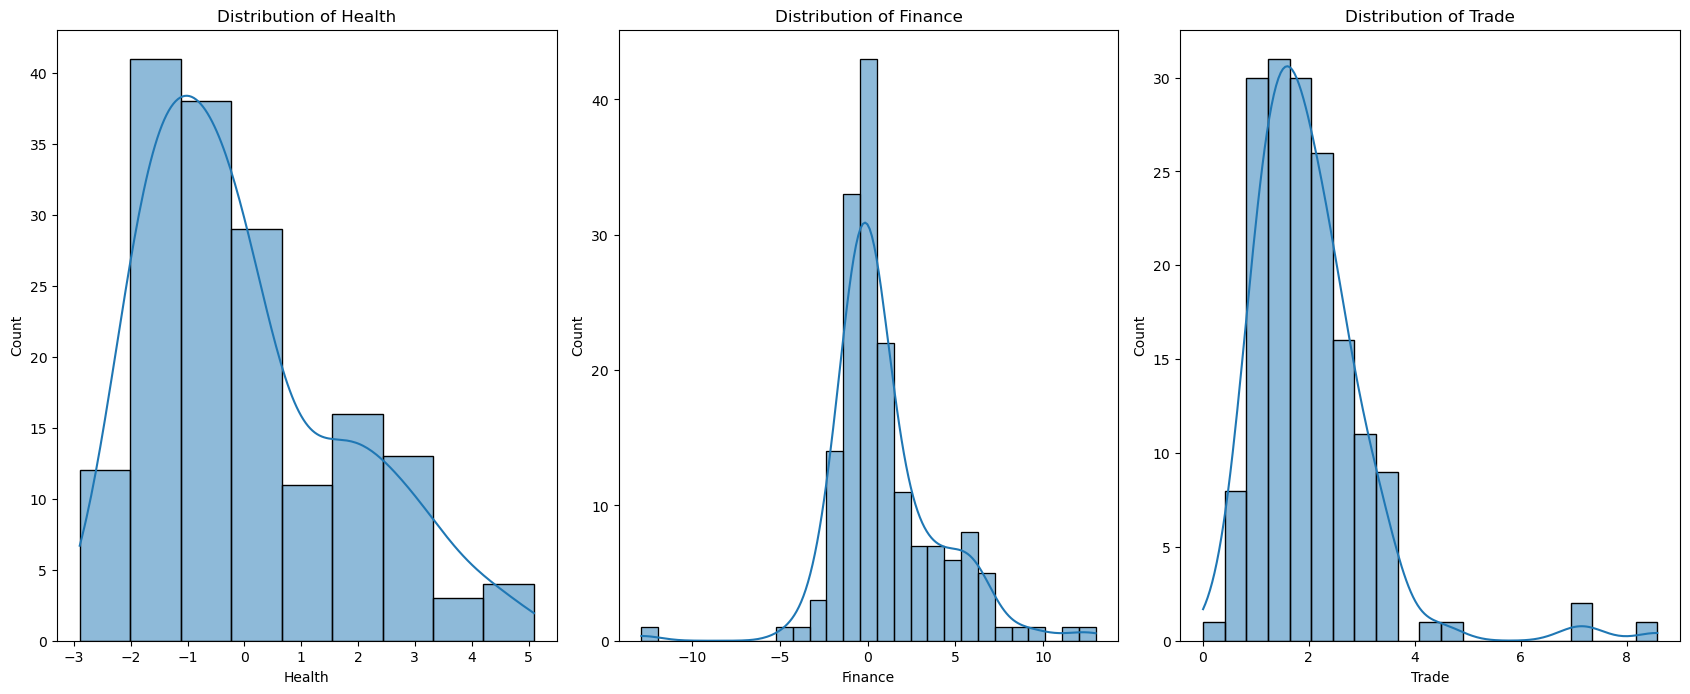

In [145]:
# Visualize the Distribution of the new data - Univariate Analysis
plt.figure(figsize = (17, 20))

for i, column_name in enumerate(new_help_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(new_help_data[column_name], kde = True)
    plt.title(f'Distribution of {column_name}')

plt.tight_layout()
plt.show();

However, the values are not well scaled, so apply feature scaling using `robust scaler` - since the distribution is close to normal - to Standardize the new data.

#### Feature Scaling

In [146]:
# New Data before scaling
new_help_data.head()

,Health,Finance,Trade
0,2.422504,-1.076519,1.200812
1,-1.048966,0.317688,1.717580
2,-0.002385,-0.972476,1.603752
3,3.929096,-2.262080,2.430387
4,-0.981553,1.870058,2.362940


In [195]:
# Call the Scaler
scaler = StandardScaler()

In [198]:
# Fit and Transform the columns in the new data using the scaler
new_help_data['Health'] = scaler.fit_transform(new_help_data[['Health']])
new_help_data['Finance'] = scaler.fit_transform(new_help_data[['Finance']])
new_help_data['Trade'] = scaler.fit_transform(new_help_data[['Trade']])

In [199]:
# New Data After scaling
new_help_data.head()

,Health,Finance,Trade
0,1.384975,-0.684496,-0.726043
1,-0.599706,-0.224915,-0.256572
2,-0.001363,-0.650200,-0.359982
3,2.246312,-1.075300,0.390996
4,-0.561166,0.286803,0.329722


# Bulid the Machine Learning Model - Using K-Means Algorithm Clustering

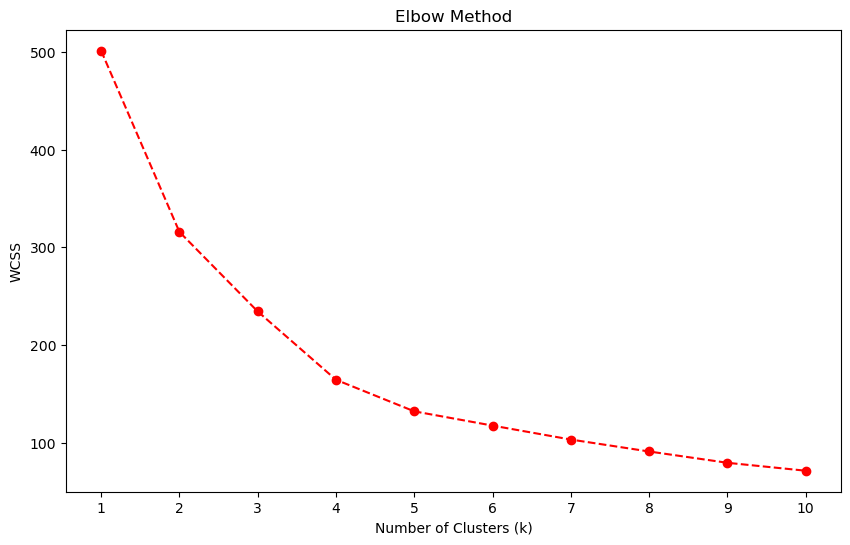

In [200]:
# Determine the Optimal Number of Clusters using the Elbow Method

wcss = [] # wcss = Within-Cluster Sum of Squares

for i in range(1, 11): # Trying k from 1 to 10
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(new_help_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss, color = 'red',marker = 'o', linestyle = '--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))

plt.show();

#### Train The Model

In [202]:
# Fit K-Means Clustering Model
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(new_help_data)

KMeans(n_clusters=3, random_state=42)

In [203]:
# Cluster points
cluster = kmeans.cluster_centers_

In [204]:
# Kmeans Label
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [205]:
# Original data
help_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [206]:
# Add Class Labels to the Data
help_data['Class'] = kmeans.labels_

In [207]:
help_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [208]:
# Get the counts of the class column
help_data['Class'].value_counts()

Class
0    84
1    42
2    41
Name: count, dtype: int64

#### Evalute The Model
Since we know low income and high child mortality are related

Lets plot Income and Child mortality w.r.t class predictions


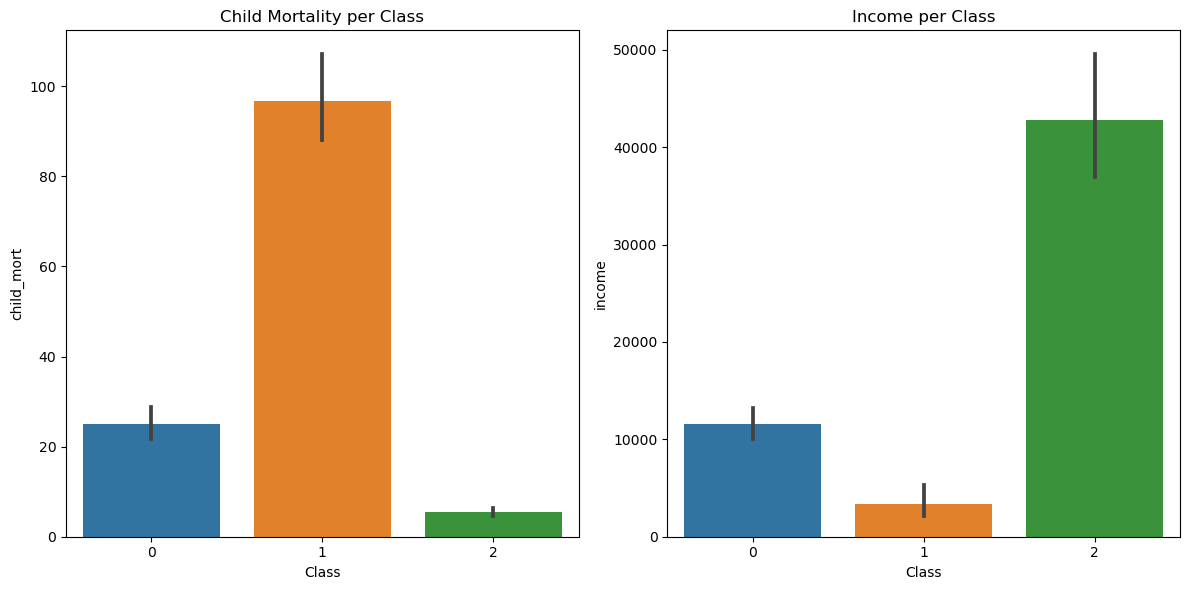

In [209]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x ='Class', y ='child_mort', data = help_data) 
plt.title('Child Mortality per Class')

plt.subplot(1,2,2)
sns.barplot(x = 'Class', y ='income', data = help_data)
plt.title('Income per Class')

plt.tight_layout()
plt.show()

It is clear to conlude that:

`0 :` Requires foreign aid
`1 :` Not a priority
`2 :` Do NOT requires foreign aid

In [211]:
# Replace the classes with the new names
help_data['Class'][help_data['Class'] == 0]= 'Requires foreign aid'
help_data['Class'][help_data['Class'] == 1]= 'Not a priority'
help_data['Class'][help_data['Class'] == 2]= 'Do NOT requires foreign aid'

In [212]:
help_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Class
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Not a priority
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Requires foreign aid
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Requires foreign aid
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Not a priority
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Requires foreign aid


In [213]:
print('--- Countries that requires foreign aid ---')
print(list(help_data[help_data['Class'] == 'Requires foreign aid']['country']))

print('\n --- Countries not Priority ---')
print(list(help_data[help_data['Class'] == 'Not a priority']['country']))

print('\n --- Countries that DO NOT require foreign aid ---')
print(list(help_data[help_data['Class'] == 'Do NOT requires foreign aid']['country']))

--- Countries that requires foreign aid ---
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lesotho', 'Libya', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Rwanda', 'Samoa', 'Saudi Arabia', 'Serbia', 'Solomon Islands', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand', 'Tonga', 'Tunisia', 

### Plot an interactive GeoMAP showing these categories

In [214]:
fig = px.choropleth(help_data[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    color = help_data['Class'],  
                    color_discrete_map = {'Requires foreign aid':'Red',
                                        'Do NOT requires foreign aid':'Green',
                                        'Not a priority':'Yellow'}
                   )
fig.update_layout(legend_title_text = 'Country Color Maps')
fig.show()

INSIGHT: The GeoMap visualization uses three colors to indicate foreign aid needs: 

1. Yellow for non-priority countries, 
2. Red for countries in urgent need of aid, and 
3. Green for those not requiring aid. 

By prioritizing aid for the countries marked in red, Help International can allocate resources more effectively, ensuring support reaches the most critical areas and enhancing overall mission efficiency.